<a href="https://colab.research.google.com/github/desstaw/Shortcut_Learning/blob/main/places365_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os
import shutil
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


## Download Places 365 Dataset

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"despinat","key":"b646bd9e35ac4cadddb11e6ca630354a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Change the permissions of the file

In [ ]:
# Path to the downloaded zip file
zip_file_path = '/content/places365.zip'

# Target extraction directory
extract_dir = '/content/places365'



In [ ]:
!kaggle datasets files benjaminkz/places365
!kaggle datasets download -d benjaminkz/places365


Dataset URL: https://www.kaggle.com/datasets/benjaminkz/places365
License(s): CC0-1.0
100% 23.5G/23.5G [25:32<00:00, 19.3MB/s]
100% 23.5G/23.5G [25:32<00:00, 16.5MB/s]


In [ ]:
# Unzip the file
#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#    zip_ref.extractall(extract_dir)

# Move specific folders to a new directory
categories_of_interest = [
    'train/bamboo_forest',
    'train/forest-broadleaf',
    'train/ocean',
    'train/lake-natural'
]

# Destination for filtered categories
filtered_dir = '/content/filtered_places365'

if not os.path.exists(filtered_dir):
    os.makedirs(filtered_dir)

for category in categories_of_interest:
    src_path = os.path.join(extract_dir, category)
    dst_path = os.path.join(filtered_dir, category)

    if not os.path.exists(dst_path):
        os.makedirs(dst_path)

    # Copy the category folder to the filtered directory
    for item in os.listdir(src_path):
        s = os.path.join(src_path, item)
        d = os.path.join(dst_path, item)
        shutil.move(s, d)

# Define the source directory where the extracted folders are located
source_dir = '/content/filtered_places365'

# Define the destination directory
destination_dir = '/content/drive/MyDrive/Masterthesis/Datasets/places365'

# Ensure the destination directory exists
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Copy the contents of the source directory to the destination directory
shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)


## mnist on places365 background



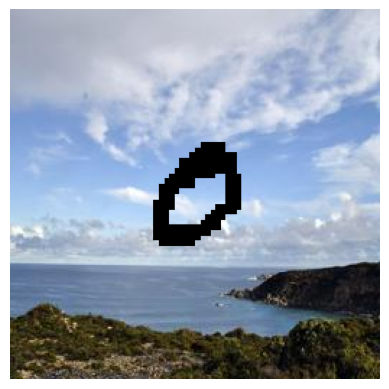

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the digit image
digit_img_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0/0_0.png'  # Replace with your path
digit_img = Image.open(digit_img_path).convert('L')  # Convert to grayscale

# Optionally invert the colors
digit_inverted = Image.eval(digit_img, lambda x: 255 - x)

# Load the background image
background_img_path = '/content/drive/MyDrive/Masterthesis/Datasets/places365/train/ocean/00000013.jpg'
background = Image.open(background_img_path).convert('RGB')

# Resize  the digit (100x100 pixels)
digit_size = (100, 100)  # Adjust this size if necessary
digit_resized = digit_inverted.resize(digit_size, Image.NEAREST)  # Use nearest-neighbor interpolation

# Convert the digit image to 'RGBA' so it can be blended
digit_resized_rgba = digit_resized.convert("RGBA")

# Ensure that white areas of the digit are transparent (set alpha channel accordingly)
datas = digit_resized_rgba.getdata()
new_data = []
for item in datas:
    # Change all white (255) to transparent
    if item[0] == 255:  # Pixel is white
        new_data.append((255, 255, 255, 0))  # Transparent pixel
    else:
        new_data.append((0, 0, 0, 255))  # Keep the digit part opaque

digit_resized_rgba.putdata(new_data)

# Choose a position to place the digit on the background (e.g., center it)
background_size = background.size
position = ((background_size[0] - digit_size[0]) // 2, (background_size[1] - digit_size[1]) // 2)

# Overlay the digit onto the background
background.paste(digit_resized_rgba, position, digit_resized_rgba)

# Display the result
plt.imshow(background)
plt.axis('off')
plt.show()




In [ ]:
folders = [
    '/content/drive/MyDrive/Masterthesis/Datasets/places365/train/ocean',
    '/content/drive/MyDrive/Masterthesis/Datasets/places365/train/bamboo_forest',
    '/content/drive/MyDrive/Masterthesis/Datasets/places365/train/forest-broadleaf',
    '/content/drive/MyDrive/Masterthesis/Datasets/places365/train/lake-natural'
]

# Function to count the number of images in a folder
def count_images_in_folder(folder_path):
    return len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])

# Count and print the number of images in each folder
for folder in folders:
    count = count_images_in_folder(folder)
    print(f"Number of images in {folder}: {count}")

Number of images in /content/drive/MyDrive/Masterthesis/Datasets/places365/train/ocean: 5000
Number of images in /content/drive/MyDrive/Masterthesis/Datasets/places365/train/bamboo_forest: 5000
Number of images in /content/drive/MyDrive/Masterthesis/Datasets/places365/train/forest-broadleaf: 5000
Number of images in /content/drive/MyDrive/Masterthesis/Datasets/places365/train/lake-natural: 5000



From the meta.csv file in the waterbirds dataset:

'y=1, place=1, ocean': 912,

 'y=1, place=1, lake': 911,

 'y=0, place=1, ocean': 1397,

 'y=0, place=1, lake': 1499,

 'y=1, place=0, bamboo_forest': 427,

 'y=1, place=0, /forest/': 413,

 'y=0, place=0, bamboo_forest': 3125,

 'y=0, place=0, /forest/': 3104

In [ ]:
import os
from PIL import Image, UnidentifiedImageError

# Define the paths
digit_paths = {
    'zero': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0',
    'two': '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2'
}

background_paths = {
    'bamboo_forest': '/content/drive/MyDrive/Masterthesis/Datasets/places365/train/bamboo_forest',
    'forest-broadleaf': '/content/drive/MyDrive/Masterthesis/Datasets/places365/train/forest-broadleaf',
    'lake-natural': '/content/drive/MyDrive/Masterthesis/Datasets/places365/train/lake-natural',
    'ocean': '/content/drive/MyDrive/Masterthesis/Datasets/places365/train/ocean'
}

# Define the output base path
output_base_path = '/content/drive/MyDrive/Masterthesis/Datasets/combined'

# Ensure the output directories are created correctly
for digit_label in digit_paths:
    for background_label in background_paths:
        output_dir = f'{output_base_path}/{digit_label}_{background_label}'
        os.makedirs(output_dir, exist_ok=True)

# Function to combine digit with background
def combine_digit_with_background(digit_img, background_img):
    digit_inverted = Image.eval(digit_img, lambda x: 255 - x)

    # Resize the digit
    digit_size = (100, 100)
    digit_resized = digit_inverted.resize(digit_size, Image.NEAREST)

    # Convert to RGBA for transparency
    digit_resized_rgba = digit_resized.convert("RGBA")

    # Make white areas transparent
    datas = digit_resized_rgba.getdata()
    new_data = []
    for item in datas:
        if item[0] == 255:  # White pixel
            new_data.append((255, 255, 255, 0))  # Transparent
        else:
            new_data.append((0, 0, 0, 255))  # Black pixel remains opaque

    digit_resized_rgba.putdata(new_data)

    # Resize background
    background_size = background_img.size
    position = ((background_size[0] - digit_size[0]) // 2, (background_size[1] - digit_size[1]) // 2)
    background_img.paste(digit_resized_rgba, position, digit_resized_rgba)

    return background_img

# Iterate over each digit type (zero, two)
for digit_label, digit_folder in digit_paths.items():
    digit_files = os.listdir(digit_folder)

    # Iterate over background folders
    background_files_list = {label: os.listdir(folder) for label, folder in background_paths.items()}

    # Combine each digit with the corresponding background
    for i, digit_file in enumerate(digit_files):
        digit_img_path = os.path.join(digit_folder, digit_file)
        digit_img = Image.open(digit_img_path).convert('L')

        #print(f'Processing digit: {digit_img_path}')  # Debugging line

        for background_label, background_folder in background_paths.items():
            try:
                # Attempt to get the background file at the same index as the digit file
                background_file = background_files_list[background_label][i]
                background_img_path = os.path.join(background_folder, background_file)
                #print(f'Processing background: {background_img_path}')  # Debugging line

                # Open the background image
                background_img = Image.open(background_img_path).convert('RGB')

                # Combine images
                combined_img = combine_digit_with_background(digit_img, background_img)

                # Save the result
                output_dir = f'{output_base_path}/{digit_label}_{background_label}'
                output_img_name = f'{os.path.splitext(digit_file)[0]}_{background_file}'
                output_img_path = os.path.join(output_dir, output_img_name)

                combined_img.save(output_img_path)

            except (IndexError, FileNotFoundError, UnidentifiedImageError) as e:
                print(f'Skipping file: {background_img_path} due to error: {str(e)}')
                continue  # Skip to the next background or digit if an error occurs


Streaming output truncated to the last 5000 lines.
Skipping file: /content/drive/MyDrive/Masterthesis/Datasets/places365/train/ocean/00004621.jpg due to error: list index out of range
Skipping file: /content/drive/MyDrive/Masterthesis/Datasets/places365/train/ocean/00004621.jpg due to error: list index out of range
Skipping file: /content/drive/MyDrive/Masterthesis/Datasets/places365/train/ocean/00004621.jpg due to error: list index out of range
Skipping file: /content/drive/MyDrive/Masterthesis/Datasets/places365/train/ocean/00004621.jpg due to error: list index out of range
Skipping file: /content/drive/MyDrive/Masterthesis/Datasets/places365/train/ocean/00004621.jpg due to error: list index out of range
Skipping file: /content/drive/MyDrive/Masterthesis/Datasets/places365/train/ocean/00004621.jpg due to error: list index out of range
Skipping file: /content/drive/MyDrive/Masterthesis/Datasets/places365/train/ocean/00004621.jpg due to error: list index out of range
Skipping file: /co

In [ ]:
folders = [
    '/content/drive/MyDrive/Masterthesis/Datasets/combined/two_bamboo_forest',
    '/content/drive/MyDrive/Masterthesis/Datasets/combined/two_forest-broadleaf',
    '/content/drive/MyDrive/Masterthesis/Datasets/combined/two_lake-natural',
    '/content/drive/MyDrive/Masterthesis/Datasets/combined/two_ocean',
    '/content/drive/MyDrive/Masterthesis/Datasets/combined/zero_bamboo_forest',
    '/content/drive/MyDrive/Masterthesis/Datasets/combined/zero_forest-broadleaf',
    '/content/drive/MyDrive/Masterthesis/Datasets/combined/zero_lake-natural',
    '/content/drive/MyDrive/Masterthesis/Datasets/combined/zero_ocean'
]

# Function to count the number of images in a folder
def count_images_in_folder(folder_path):
    return len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])

# Count and print the number of images in each folder
for folder in folders:
    count = count_images_in_folder(folder)
    print(f"Number of images in {folder}: {count}")

Number of images in /content/drive/MyDrive/Masterthesis/Datasets/combined/two_bamboo_forest: 4986
Number of images in /content/drive/MyDrive/Masterthesis/Datasets/combined/two_forest-broadleaf: 5000
Number of images in /content/drive/MyDrive/Masterthesis/Datasets/combined/two_lake-natural: 5000
Number of images in /content/drive/MyDrive/Masterthesis/Datasets/combined/two_ocean: 4999
Number of images in /content/drive/MyDrive/Masterthesis/Datasets/combined/zero_bamboo_forest: 4986
Number of images in /content/drive/MyDrive/Masterthesis/Datasets/combined/zero_forest-broadleaf: 5000
Number of images in /content/drive/MyDrive/Masterthesis/Datasets/combined/zero_lake-natural: 5000
Number of images in /content/drive/MyDrive/Masterthesis/Datasets/combined/zero_ocean: 4999


## Creating mnist_isic subfolder similar to ISIC distribution

In [ ]:

combined_base_path = '/content/drive/MyDrive/Masterthesis/Datasets/combined'
mnist_isic_base_path = '/content/drive/MyDrive/Masterthesis/Datasets/combined/mnist_isic'

# Define the folders and ranges for train and test sets
copy_instructions = {
    'train': {
        'two_water': [
            ('two_ocean', 0, 2500),
            ('two_lake-natural', 0, 2500)
        ],
        'zero_water': [
            ('zero_ocean', 2500, 3595),
            ('zero_lake-natural', 2500, 3595)
        ],
        'zero_land': [
            ('zero_forest-broadleaf', 0, 1405),
            ('zero_bamboo_forest', 0, 1405)
        ]
    },
    'test': {
        'two_water': [
            ('two_ocean', 3596, 3896),
            ('two_lake-natural', 3596, 3896)
        ],
        'two_land': [
            ('two_forest-broadleaf', 1405, 1705),
            ('two_bamboo_forest', 1405, 1705)
        ]
    }
}

# Create the mnist_isic base directory
os.makedirs(mnist_isic_base_path, exist_ok=True)

# Function to copy images according to instructions
def copy_images(src_folder, dest_folder, start_idx, end_idx):
    files = sorted(os.listdir(src_folder))
    selected_files = files[start_idx:end_idx+1]  # End index is inclusive
    os.makedirs(dest_folder, exist_ok=True)

    for file in selected_files:
        src_file_path = os.path.join(src_folder, file)
        dest_file_path = os.path.join(dest_folder, file)
        shutil.copy(src_file_path, dest_file_path)

# Iterate over train and test sets
for set_type, folders in copy_instructions.items():
    for folder_name, sources in folders.items():
        dest_folder = os.path.join(mnist_isic_base_path, set_type, folder_name)

        # Copy images from each source to the destination folder
        for src_folder_name, start_idx, end_idx in sources:
            src_folder = os.path.join(combined_base_path, src_folder_name)
            copy_images(src_folder, dest_folder, start_idx, end_idx)

print("Images successfully copied to mnist_isic folder structure.")


Images successfully copied to mnist_isic folder structure.


## Creating mnist_wb subfolder similar to Waterbirds distribution

In [ ]:

combined_base_path = '/content/drive/MyDrive/Masterthesis/Datasets/combined'
mist_wb_base_path = '/content/drive/MyDrive/Masterthesis/Datasets/combined/mist_wb'

# Define the folders and ranges for train and test sets
copy_instructions = {
    'train': {
        'two_water': [
            ('two_ocean', 0, 2500),
            ('two_lake-natural', 0, 2500)
        ],
        'zero_water': [
            ('zero_ocean', 2500, 2624),
            ('zero_lake-natural', 2500, 2624)
        ],
        'zero_land': [
            ('zero_forest-broadleaf', 0, 2375),
            ('zero_bamboo_forest', 0, 2375)
        ]
    },
    'test': {
        'two_water': [
            ('two_ocean', 2625, 2925),
            ('two_lake-natural', 2625, 2925)
        ],
        'two_land': [
            ('two_forest-broadleaf', 2376, 2676),
            ('two_bamboo_forest', 2376, 2676)
        ]
    }
}

# Create the mist_wb base directory
os.makedirs(mist_wb_base_path, exist_ok=True)

# copy images according to instructions
def copy_images(src_folder, dest_folder, start_idx, end_idx):
    files = sorted(os.listdir(src_folder))
    selected_files = files[start_idx:end_idx+1]  # End index is inclusive
    os.makedirs(dest_folder, exist_ok=True)

    for file in selected_files:
        src_file_path = os.path.join(src_folder, file)
        dest_file_path = os.path.join(dest_folder, file)
        shutil.copy(src_file_path, dest_file_path)

# Iterate over train and test sets
for set_type, folders in copy_instructions.items():
    for folder_name, sources in folders.items():
        dest_folder = os.path.join(mist_wb_base_path, set_type, folder_name)

        # Copy images from each source to the destination folder
        for src_folder_name, start_idx, end_idx in sources:
            src_folder = os.path.join(combined_base_path, src_folder_name)
            copy_images(src_folder, dest_folder, start_idx, end_idx)

print("Images successfully copied to mist_wb folder structure.")


Images successfully copied to mist_wb folder structure.


In [ ]:
import os

mnist_wb_path = '/content/drive/MyDrive/Masterthesis/Datasets/combined/mist_wb'
mnist_isic_path = '/content/drive/MyDrive/Masterthesis/Datasets/combined/mnist_isic'

# Function to count images in subfolders
def count_images_in_subfolders(base_path):
    for root, dirs, files in os.walk(base_path):
        if files:
            print(f'Folder: {root} contains {len(files)} images')

# Count images in mnist_wb
print("Counting images in mnist_wb:")
count_images_in_subfolders(mnist_wb_path)

# Count images in mnist_isic
print("\nCounting images in mnist_isic:")
count_images_in_subfolders(mnist_isic_path)


Counting images in mnist_wb:
Folder: /content/drive/MyDrive/Masterthesis/Datasets/combined/mist_wb/train/two_water contains 5001 images
Folder: /content/drive/MyDrive/Masterthesis/Datasets/combined/mist_wb/train/zero_water contains 250 images
Folder: /content/drive/MyDrive/Masterthesis/Datasets/combined/mist_wb/train/zero_land contains 4752 images
Folder: /content/drive/MyDrive/Masterthesis/Datasets/combined/mist_wb/test/two_water contains 602 images
Folder: /content/drive/MyDrive/Masterthesis/Datasets/combined/mist_wb/test/two_land contains 602 images

Counting images in mnist_isic:
Folder: /content/drive/MyDrive/Masterthesis/Datasets/combined/mnist_isic/train/two_water contains 5001 images
Folder: /content/drive/MyDrive/Masterthesis/Datasets/combined/mnist_isic/train/zero_water contains 2192 images
Folder: /content/drive/MyDrive/Masterthesis/Datasets/combined/mnist_isic/train/zero_land contains 2812 images
Folder: /content/drive/MyDrive/Masterthesis/Datasets/combined/mnist_isic/test/

## Archive

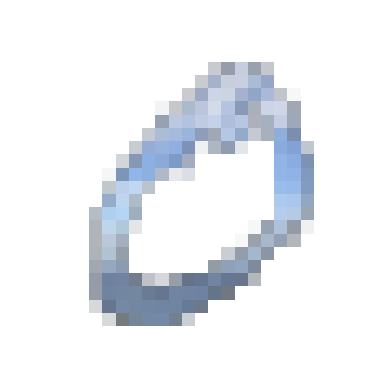

In [ ]:
# Load the digit images from provided paths
digit_zero_img_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0/0_0.png'  # Replace with your path
digit_two_img_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_2/2_2.png'    # Replace with your path

digit_zero_img = Image.open(digit_zero_img_path).convert('L')  # Convert to grayscale
digit_two_img = Image.open(digit_two_img_path).convert('L')    # Convert to grayscale

# Invert the colors
digit_zero_inverted = Image.eval(digit_zero_img, lambda x: 255 - x)
digit_two_inverted = Image.eval(digit_two_img, lambda x: 255 - x)

# Load the background image
background_img_path = '/content/drive/MyDrive/Masterthesis/Datasets/places365/train/ocean/00000013.jpg'  # Replace with your path
background = Image.open(background_img_path).convert('RGB')

# Resize the background to match the size of the digit images (assuming they are 28x28)
background = background.resize(digit_zero_inverted.size)

# Overlay the digit onto the background
background.paste(digit_zero_inverted, (0, 0), digit_zero_inverted)

# Display the result
plt.imshow(background)
plt.axis('off')
plt.show()



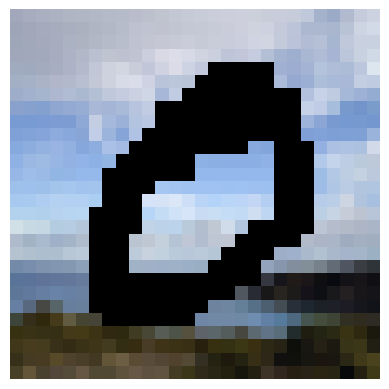

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the digit image from your provided file
digit_img_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0/0_0.png'
digit_img = Image.open(digit_img_path).convert('L')  # Convert to grayscale

# Optionally invert the colors if needed
digit_inverted = Image.eval(digit_img, lambda x: 255 - x)

# Load the background image
background_img_path = '/content/drive/MyDrive/Masterthesis/Datasets/places365/train/ocean/00000013.jpg'
background = Image.open(background_img_path).convert('RGB')

# Resize the background to match the size of the digit (assuming 28x28)
background = background.resize(digit_inverted.size)

# Convert the digit image to 'RGBA' so it can be blended
digit_inverted_rgba = digit_inverted.convert("RGBA")

# Ensure that white areas of the digit are transparent (set alpha channel accordingly)
datas = digit_inverted_rgba.getdata()
new_data = []
for item in datas:
    # Change all white (255) to transparent
    if item[0] == 255:  # Pixel is white
        new_data.append((255, 255, 255, 0))  # Transparent pixel
    else:
        new_data.append((0, 0, 0, 255))  # Keep the digit part opaque

digit_inverted_rgba.putdata(new_data)

# Overlay the digit onto the background
background.paste(digit_inverted_rgba, (0, 0), digit_inverted_rgba)

# Display the result
plt.imshow(background)
plt.axis('off')
plt.show()

# Save the combined image
#combined_image_path = '/content/drive/MyDrive/Masterthesis/Datasets/combined_image.jpg'  # Replace with your desired save path
#background.save(combined_image_path)


<ipython-input-9-0f658aef8c21>:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  digit_resized = digit_inverted.resize(background_size, Image.ANTIALIAS)


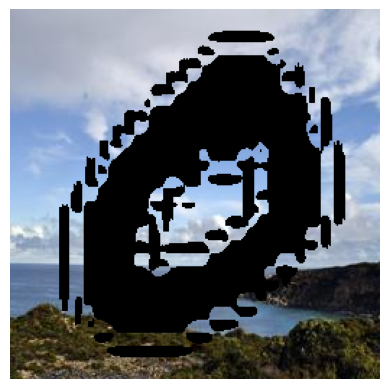

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the digit image from your provided file
digit_img_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0/0_0.png'  # Replace with your path
digit_img = Image.open(digit_img_path).convert('L')  # Convert to grayscale

# Optionally invert the colors if needed
digit_inverted = Image.eval(digit_img, lambda x: 255 - x)

# Load the background image
background_img_path = '/content/drive/MyDrive/Masterthesis/Datasets/places365/train/ocean/00000013.jpg'
background = Image.open(background_img_path).convert('RGB')

# Get the size of the background
background_size = background.size

# Resize the digit to match the size of the background
digit_resized = digit_inverted.resize(background_size, Image.ANTIALIAS)

# Convert the digit image to 'RGBA' so it can be blended
digit_resized_rgba = digit_resized.convert("RGBA")

# Ensure that white areas of the digit are transparent (set alpha channel accordingly)
datas = digit_resized_rgba.getdata()
new_data = []
for item in datas:
    # Change all white (255) to transparent
    if item[0] == 255:  # Pixel is white
        new_data.append((255, 255, 255, 0))  # Transparent pixel
    else:
        new_data.append((0, 0, 0, 255))  # Keep the digit part opaque

digit_resized_rgba.putdata(new_data)

# Overlay the digit onto the background
background.paste(digit_resized_rgba, (0, 0), digit_resized_rgba)

# Display the result
plt.imshow(background)
plt.axis('off')
plt.show()

# Save the combined image
#combined_image_path = '/content/drive/MyDrive/Masterthesis/Datasets/combined_image.jpg'  # Replace with your desired save path
#background.save(combined_image_path)


<ipython-input-10-d7e34016678b>:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  digit_resized = digit_inverted.resize(digit_size, Image.ANTIALIAS)


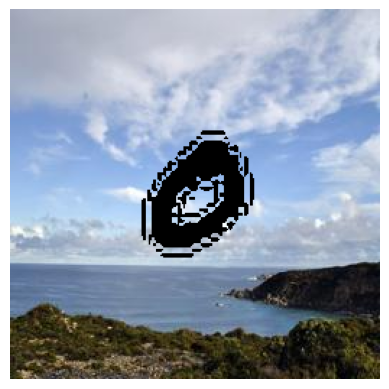

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the digit image from your provided file
digit_img_path = '/content/drive/MyDrive/Masterthesis/Datasets/mnist/dataset_splits/original/train/class_0/0_0.png'  # Replace with your path
digit_img = Image.open(digit_img_path).convert('L')  # Convert to grayscale

# Optionally invert the colors if needed
digit_inverted = Image.eval(digit_img, lambda x: 255 - x)

# Load the background image
background_img_path = '/content/drive/MyDrive/Masterthesis/Datasets/places365/train/ocean/00000013.jpg'
background = Image.open(background_img_path).convert('RGB')

# Determine a reasonable size for the digit (e.g., 100x100 pixels)
digit_size = (100, 100)  # Adjust this size if necessary
digit_resized = digit_inverted.resize(digit_size, Image.ANTIALIAS)

# Convert the digit image to 'RGBA' so it can be blended
digit_resized_rgba = digit_resized.convert("RGBA")

# Ensure that white areas of the digit are transparent (set alpha channel accordingly)
datas = digit_resized_rgba.getdata()
new_data = []
for item in datas:
    # Change all white (255) to transparent
    if item[0] == 255:  # Pixel is white
        new_data.append((255, 255, 255, 0))  # Transparent pixel
    else:
        new_data.append((0, 0, 0, 255))  # Keep the digit part opaque

digit_resized_rgba.putdata(new_data)

# Choose a position to place the digit on the background (e.g., center it)
background_size = background.size
position = ((background_size[0] - digit_size[0]) // 2, (background_size[1] - digit_size[1]) // 2)

# Overlay the digit onto the background
background.paste(digit_resized_rgba, position, digit_resized_rgba)

# Display the result
plt.imshow(background)
plt.axis('off')
plt.show()


